### 1. Importing the libraries and dataset

In [1]:
import os
import sys

sys.path.append(os.path.abspath(r"D:\practice projects files\Machine Learning\Breast Cancer Detection"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from src.data_loader import load_data
data = load_data()
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. Data Exploration

In [4]:
data.shape

(569, 33)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
print(data.select_dtypes(include="object").columns)
print("----------------------------------------------------")
print(data.select_dtypes(include=["float64","int64"]).columns)

Index(['diagnosis'], dtype='object')
----------------------------------------------------
Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## 2.1 Target Variable Distribution

We check the count of malignant and benign tumors.

In [8]:
data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

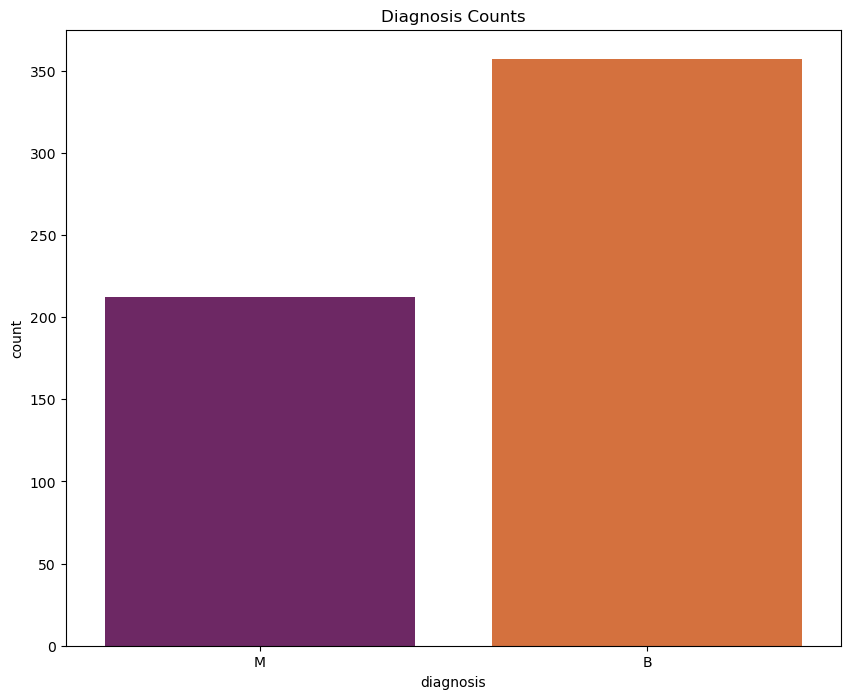

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(data = data,x ="diagnosis" , palette ="inferno" , hue = "diagnosis" )
plt.title("Diagnosis Counts")
plt.show()

## 2.2 Correlation Analysis

Check correlations between numeric features using a heatmap. Highly correlated features may influence feature selection.

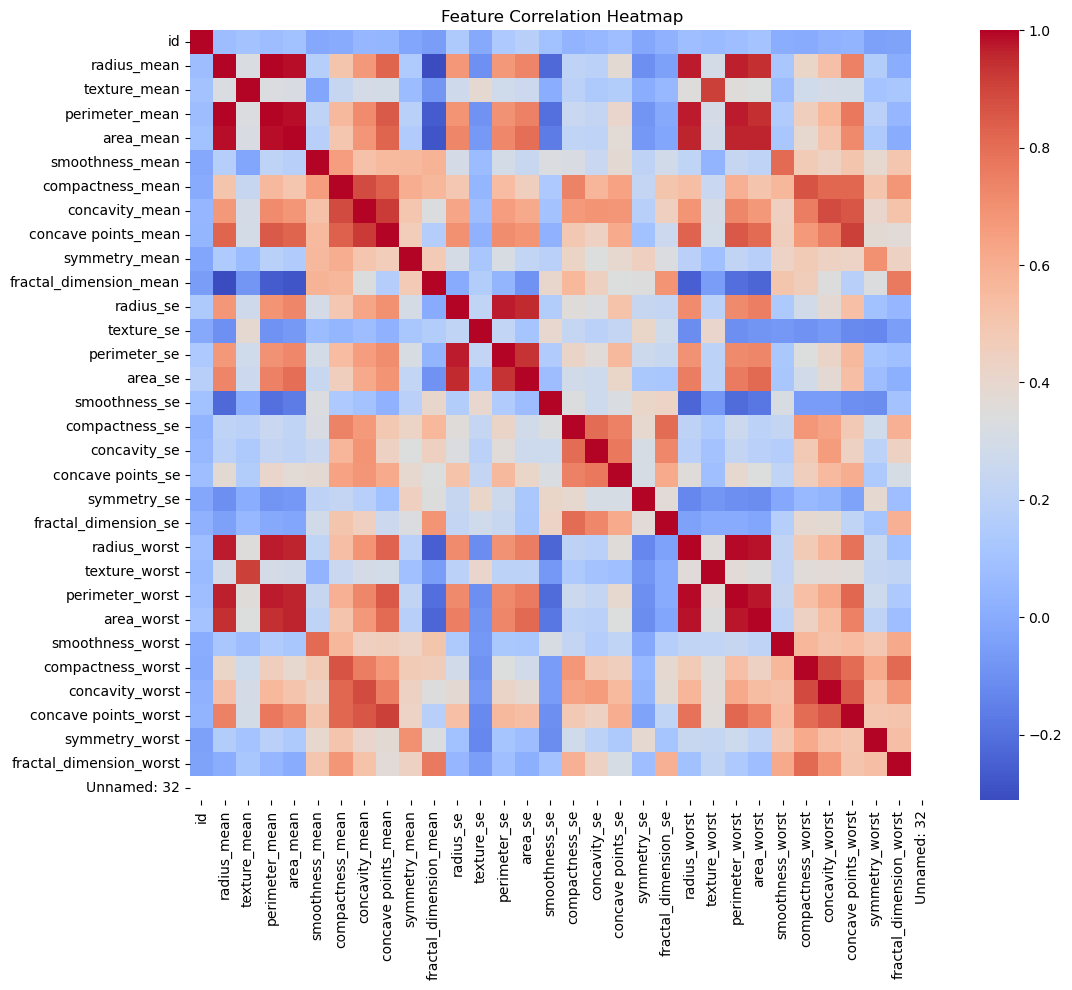

In [10]:
numeric_columns = data.select_dtypes(include=["float64","int64"]).columns

corr = data[numeric_columns].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr , cmap="coolwarm" , annot = False)
plt.title("Feature Correlation Heatmap")
plt.show()

## 2.5 Feature Distributions

Visualize the distribution of numeric features using histograms to understand patterns and skewness.

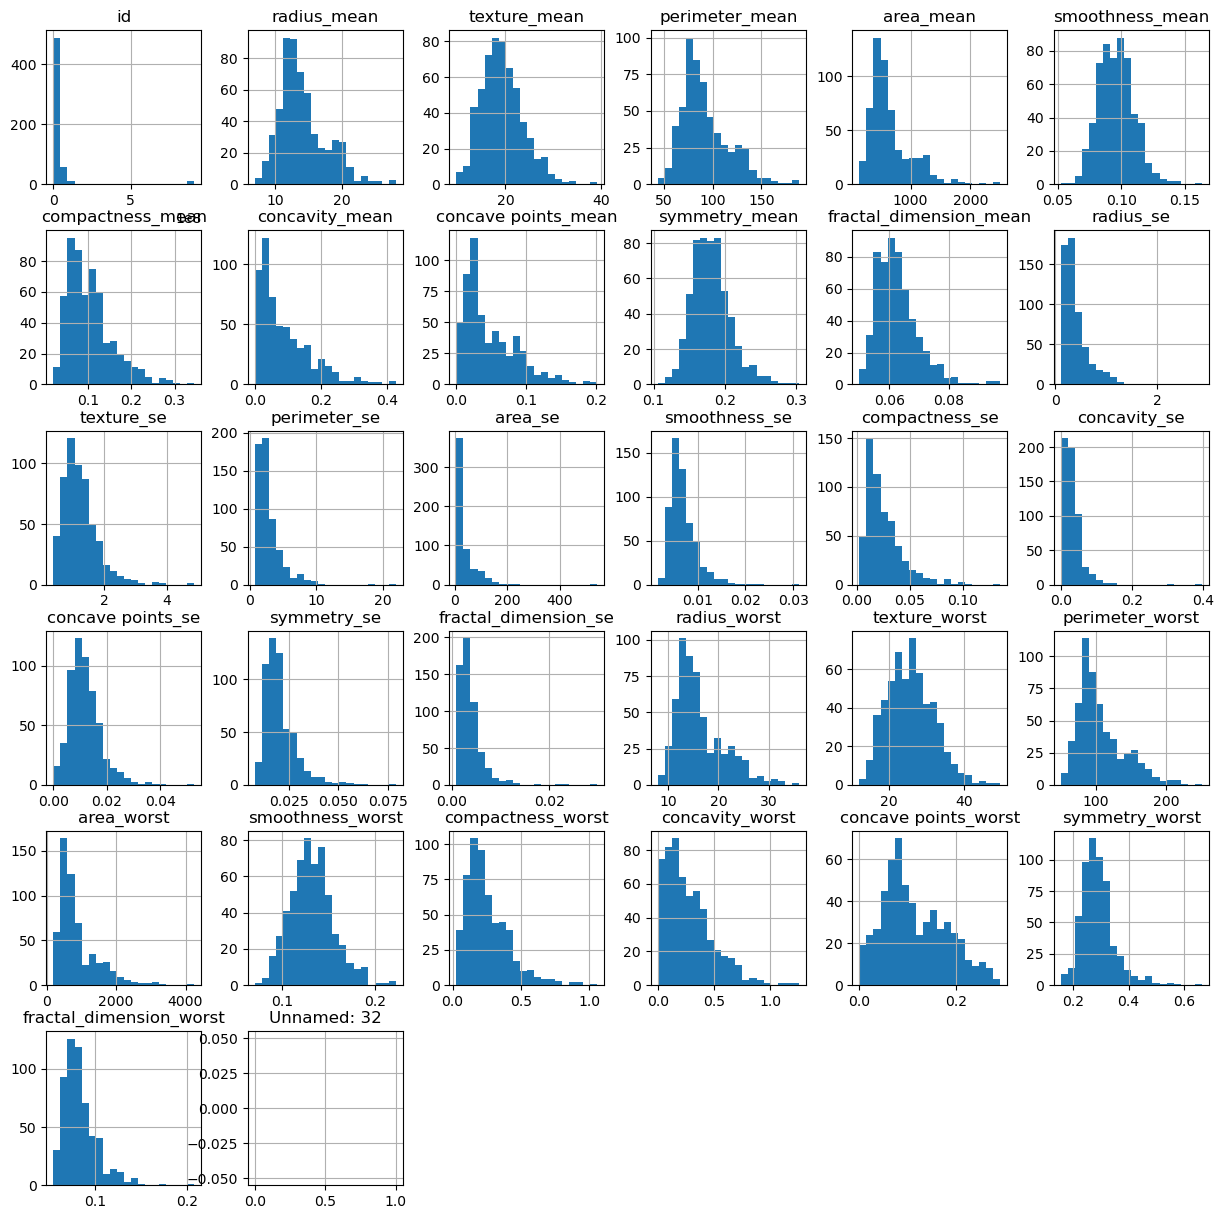

In [11]:
data[numeric_columns].hist(bins = 20 , figsize=(15,15))
plt.show()

## 3. Dealing with Missing Values

Before proceeding with analysis and modeling, it is important to handle any missing values in the dataset.

In [12]:
data.isnull().values.any()

True

In [13]:
data.isnull().values.sum()

569

In [14]:
data.columns[data.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [15]:
data = data.drop(columns='Unnamed: 32')


In [16]:
data.shape

(569, 32)

## 4. Dealing with Categorical Data

The dataset contains one categorical column: **`diagnosis`**, which indicates whether the tumor is benign (`B`) or malignant (`M`).  



In [17]:
print(data.select_dtypes(include='object').columns)
print("---------------------------------------------")
print(data['diagnosis'].unique())

Index(['diagnosis'], dtype='object')
---------------------------------------------
['M' 'B']


In [18]:
data = pd.get_dummies(data , drop_first=True)
data

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,True
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,True
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,True
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,True


## 5. Class Distribution (Countplot)

To understand the balance of classes in the dataset, we plot a **countplot** of the target variable (`diagnosis_M`):

- `False` = Benign (B)
- `True` = Malignant (M)

This visualization shows how many benign vs malignant cases are present.


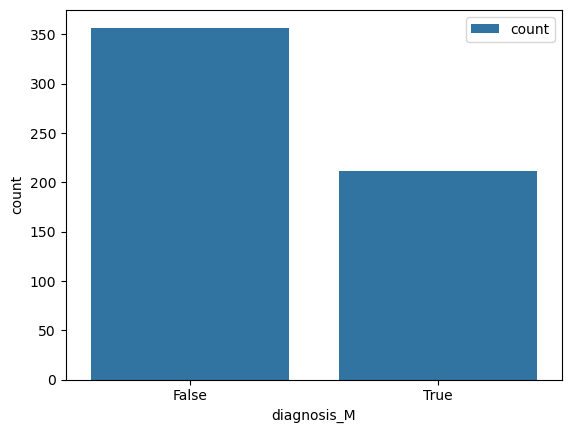

In [19]:

sns.countplot(x = data["diagnosis_M"] , label="count")
plt.show()


## 6. Correlation Analysis

Correlation analysis helps us understand the relationship between features and the target variable (`diagnosis_M`), as well as relationships between features themselves.


In [20]:
data_2 = data.drop(columns="diagnosis_M")
data_2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: title={'center': 'Correlation with diagnosis_M'}>

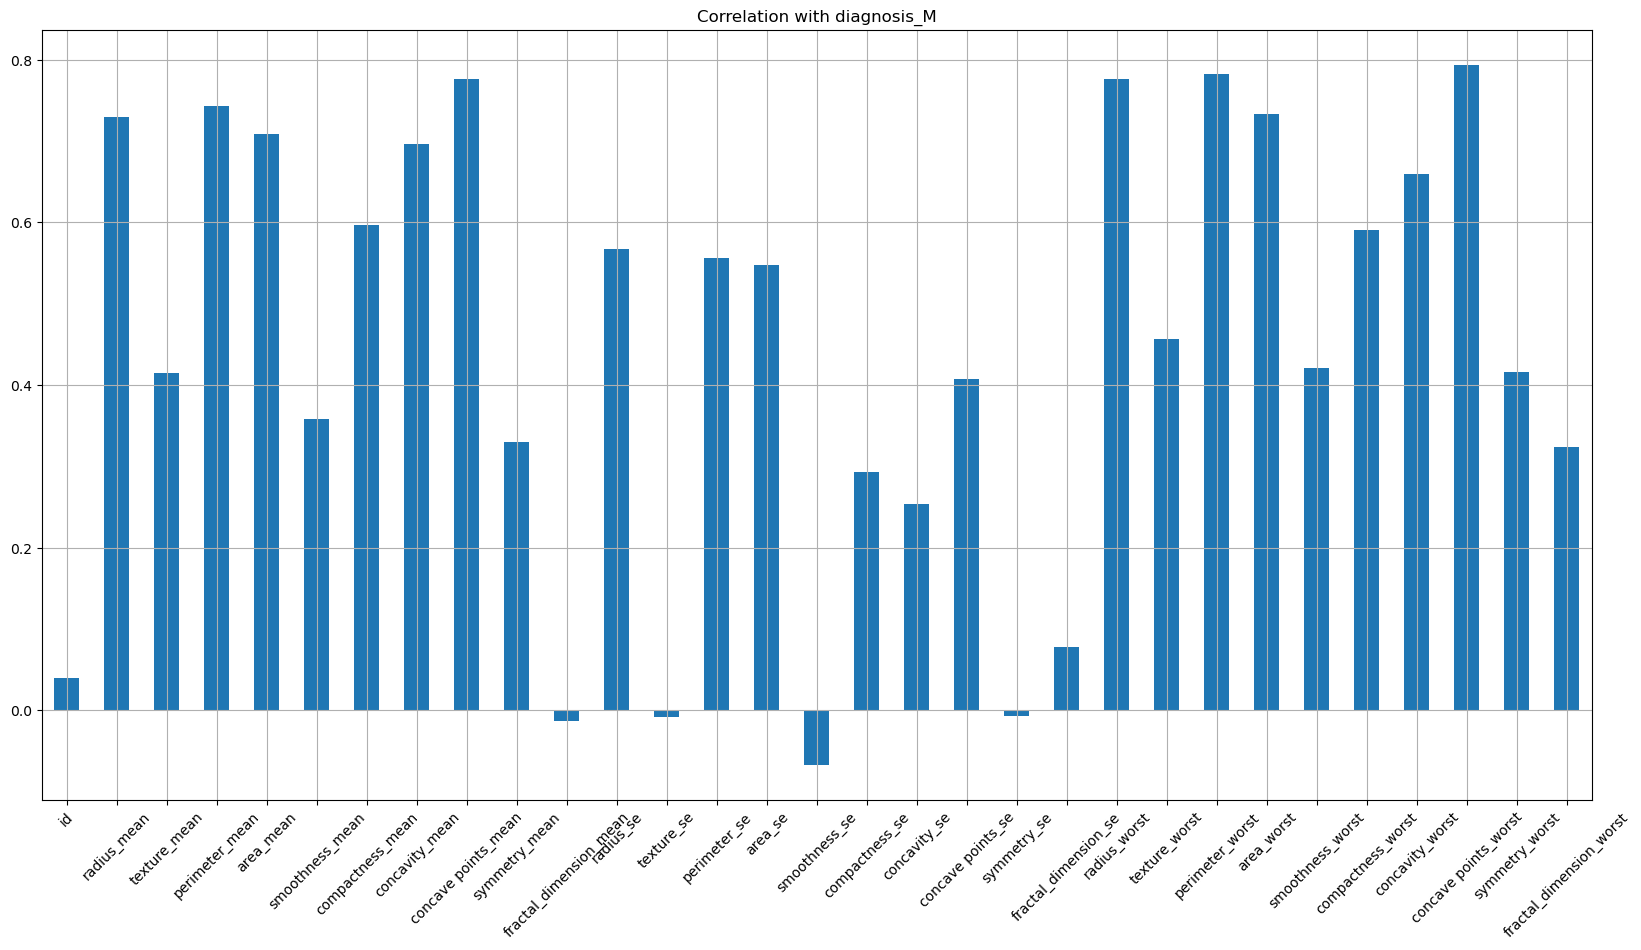

In [21]:
data_2.corrwith(data["diagnosis_M"]).plot.bar(
    figsize=(20,10),
    title="Correlation with diagnosis_M",
    rot=45,
    grid=True
)


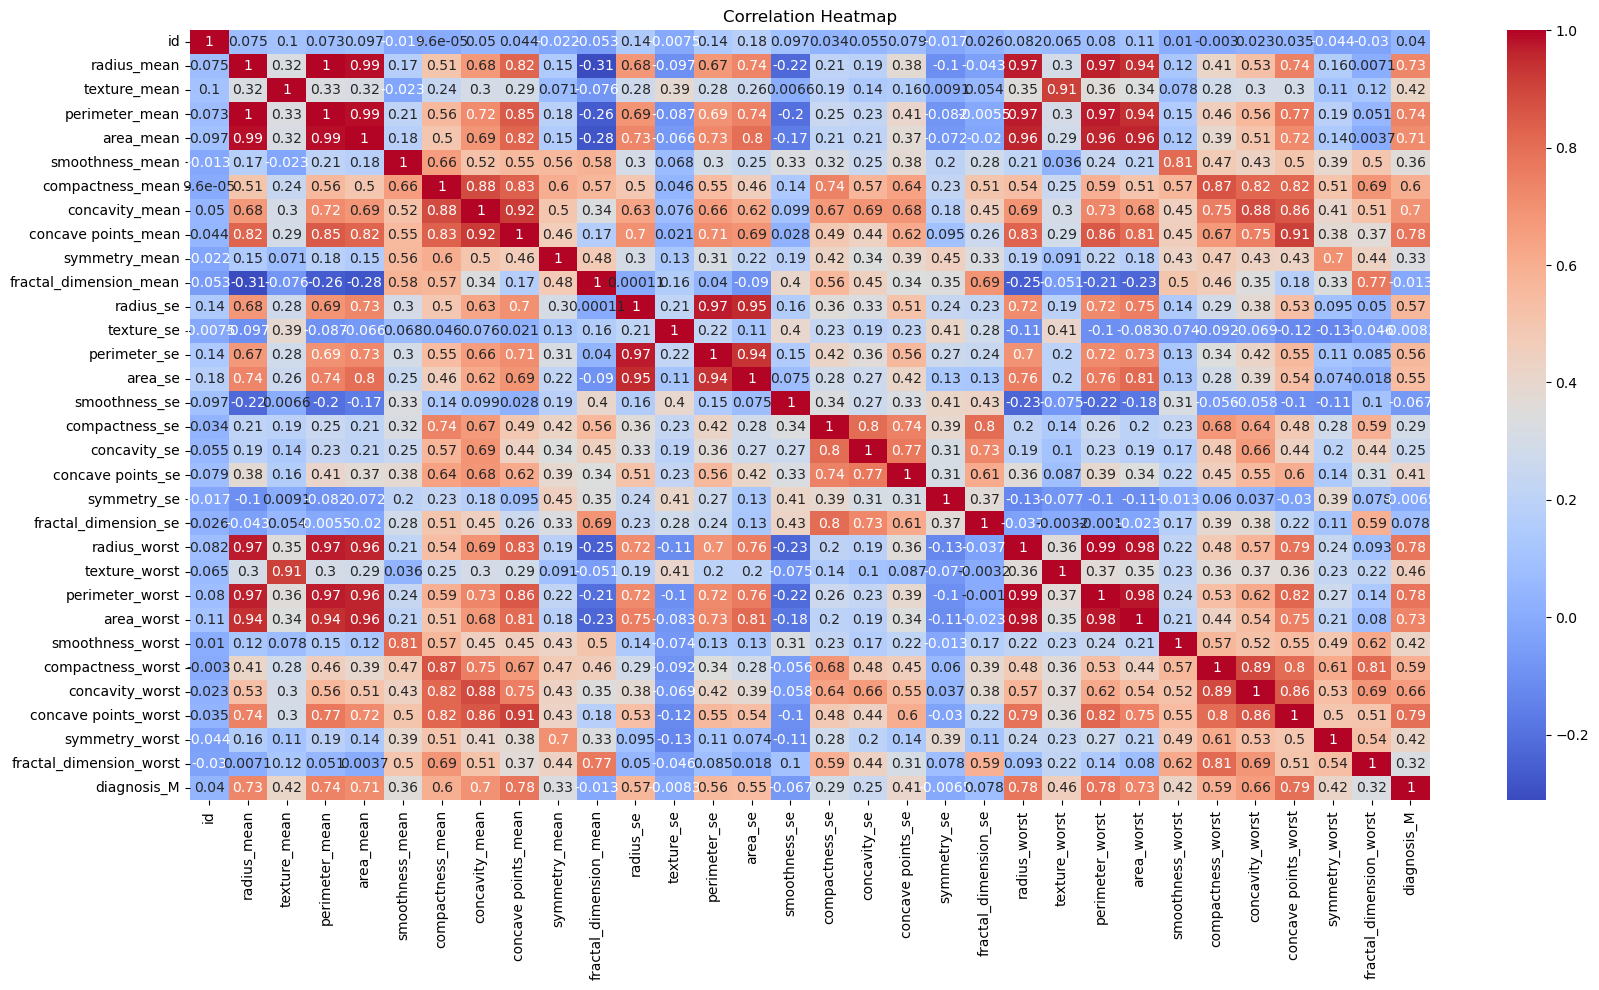

In [22]:
corr = data.corr()


plt.figure(figsize=(20,10))
sns.heatmap(corr , annot=True, cmap="coolwarm" )
plt.title("Correlation Heatmap")
plt.show()

## 7. Splitting the Dataset into Train and Test Sets  

To evaluate our model’s performance, we split the dataset into training and testing sets.  
- The **training set** is used to fit the model.  
- The **testing set** is used to evaluate how well the model generalizes to unseen data.  

We will use an 80/20 split with `random_state=42` to ensure reproducibility.  


In [23]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


In [24]:
x = data.drop(columns=["id" , "diagnosis_M"]).values
y = data["diagnosis_M"].values

In [25]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(
    x ,y , test_size=0.2 ,
    random_state=42 , stratify=y)

## 8. Feature Scaling
We apply scaling to the training set (`fit_transform`) and use the same transformation on the test set (`transform`) to avoid data leakage.  


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

## 9. Building the Model: Logistic Regression  

We start with **Logistic Regression** as our baseline model.  

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score, precision_score , recall_score, accuracy_score, confusion_matrix
)

model = LogisticRegression(random_state=42)

model.fit(x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled)

acc = accuracy_score (y_test , y_pred)
f1 = f1_score(y_test , y_pred)
prec = precision_score(y_test , y_pred)
rec = recall_score(y_test , y_pred)
cm = confusion_matrix(y_test, y_pred)

result = pd.DataFrame(
    [["Logistic Regression", acc, f1, prec, rec]],
    columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall"]
)


print(result)
print("-------------------------------------------------------------")
print(cm)

                 Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.964912   0.95122      0.975  0.928571
-------------------------------------------------------------
[[71  1]
 [ 3 39]]


In [28]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=model, X=x_train_scaled, y=y_train, cv=10)

print("Cross-Validation Accuracies:", accuracies)
print("Mean Accuracy: {:.4f}".format(accuracies.mean()))
print("Standard Deviation: {:.4f}".format(accuracies.std()))

Cross-Validation Accuracies: [0.97826087 0.93478261 0.97826087 1.         0.93478261 0.97777778
 0.97777778 1.         0.95555556 0.97777778]
Mean Accuracy: 0.9715
Standard Deviation: 0.0219


## 10. Building the Model – Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
)

model_2 = RandomForestClassifier(random_state=42)
model_2.fit(x_train_scaled,y_train)

y_pred_2 = model_2.predict(x_test_scaled)

acc_2 = accuracy_score (y_test , y_pred_2)
f1_2 = f1_score(y_test , y_pred_2)
prec_2 = precision_score(y_test , y_pred_2)
rec_2 = recall_score(y_test , y_pred_2)
cm_2 = confusion_matrix(y_test, y_pred_2)


result_2 = pd.DataFrame(
    [["Random forest", acc_2, f1_2, prec_2, rec_2]],
    columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall"]
)


print(result_2)
print("-------------------------------------------------------------")
print(cm_2)

           Model  Accuracy  F1 Score  Precision    Recall
0  Random forest  0.973684  0.962963        1.0  0.928571
-------------------------------------------------------------
[[72  0]
 [ 3 39]]


In [30]:
models_result = pd.concat([result_2,result], ignore_index=True)
models_result

,Model,Accuracy,F1 Score,Precision,Recall
0,Random forest,0.973684,0.962963,1.000,0.928571
1,Logistic Regression,0.964912,0.951220,0.975,0.928571


In [31]:
from sklearn.model_selection import cross_val_score

accuracies_2 = cross_val_score(estimator=model_2 ,
                                X=x_train_scaled ,
                                  y = y_train , 
                                  cv =10)

print("Cross-Validation Accuracies:", accuracies_2)
print("Mean Accuracy: {:.4f}".format(accuracies_2.mean()))
print("Standard Deviation: {:.4f}".format(accuracies_2.std()))

Cross-Validation Accuracies: [1.         1.         0.97826087 1.         0.91304348 0.93333333
 0.97777778 0.95555556 0.91111111 0.93333333]
Mean Accuracy: 0.9602
Standard Deviation: 0.0339


## 11. Hyperparameter Tuning (Randomized Search for Logistic Regression)


In [49]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    "penalty" : ["l1" , "l2","elasticnet" , "none"] , 
    "C" :[0.25, 0.5, 0.75, 1.0, 1.25, 1.5,1.75,2.0],
    "solver" : ['liblinear', 'saga',"lbfgs","sag","newton-cg"] }

random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=parameters,
                                   n_iter=10,
                                   scoring="accuracy",
                                   n_jobs=-1,
                                   cv=10,
                                   verbose=3,
                                   random_state=42)
random_search.fit(x_train_scaled,y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['liblinear', 'saga', 'lbfgs',
                                                   'sag', 'newton-cg']},
                   random_state=42, scoring='accuracy', verbose=3)

In [50]:
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1.5}
Best Accuracy: 0.9736714975845411
